# Zad 16_5 

Rozwiazanie dla regresji liniowej na koncu pliku

Rozwiazanie dla klasyfikacji w 2 gim pliku

In [162]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [163]:
bike_data_raw = pd.read_csv('daily-bike-share.csv')
bike_data_raw

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1    1/1/2011       1   0     1        0        6           0   
1          2    1/2/2011       1   0     1        0        0           0   
2          3    1/3/2011       1   0     1        0        1           1   
3          4    1/4/2011       1   0     1        0        2           1   
4          5    1/5/2011       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
726      727  12/27/2012       1   1    12        0        4           1   
727      728  12/28/2012       1   1    12        0        5           1   
728      729  12/29/2012       1   1    12        0        6           0   
729      730  12/30/2012       1   1    12        0        0           0   
730      731  12/31/2012       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspeed  rentals  
0             2  0.344167  0.363625  0.805833   0.160446      331  
1             2  0.363478  0.353739  0.696087   0.248539      131  
2             1  0.196364  0.189405  0.437273   0.248309      120  
3             1  0.200000  0.212122  0.590435   0.160296      108  
4             1  0.226957  0.229270  0.436957   0.186900       82  
..          ...       ...       ...       ...        ...      ...  
726           2  0.254167  0.226642  0.652917   0.350133      247  
727           2  0.253333  0.255046  0.590000   0.155471      644  
728           2  0.253333  0.242400  0.752917   0.124383      159  
729           1  0.255833  0.231700  0.483333   0.350754      364  
730           2  0.215833  0.223487  0.577500   0.154846      439  

[731 rows x 14 columns]

In [164]:
bike_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  rentals     731 non-null    int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 80.1+ KB


In [165]:
bike_data_raw['dteday']=pd.to_datetime(bike_data_raw['dteday'])
display(bike_data_raw)
print(bike_data_raw.info())

instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1 2011-01-01       1   0     1        0        6           0   
1          2 2011-01-02       1   0     1        0        0           0   
2          3 2011-01-03       1   0     1        0        1           1   
3          4 2011-01-04       1   0     1        0        2           1   
4          5 2011-01-05       1   0     1        0        3           1   
..       ...        ...     ...  ..   ...      ...      ...         ...   
726      727 2012-12-27       1   1    12        0        4           1   
727      728 2012-12-28       1   1    12        0        5           1   
728      729 2012-12-29       1   1    12        0        6           0   
729      730 2012-12-30       1   1    12        0        0           0   
730      731 2012-12-31       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspeed  rentals  
0             2  0.344167  0.363625  0.805833   0.160446      331  
1             2  0.363478  0.353739  0.696087   0.248539      131  
2             1  0.196364  0.189405  0.437273   0.248309      120  
3             1  0.200000  0.212122  0.590435   0.160296      108  
4             1  0.226957  0.229270  0.436957   0.186900       82  
..          ...       ...       ...       ...        ...      ...  
726           2  0.254167  0.226642  0.652917   0.350133      247  
727           2  0.253333  0.255046  0.590000   0.155471      644  
728           2  0.253333  0.242400  0.752917   0.124383      159  
729           1  0.255833  0.231700  0.483333   0.350754      364  
730           2  0.215833  0.223487  0.577500   0.154846      439  

[731 rows x 14 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  rentals     731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(9)
memory usage: 80.1 KB
None


In [166]:
bike_data_raw['rentals'].describe()

count     731.000000
mean      848.176471
std       686.622488
min         2.000000
25%       315.500000
50%       713.000000
75%      1096.000000
max      3410.000000
Name: rentals, dtype: float64

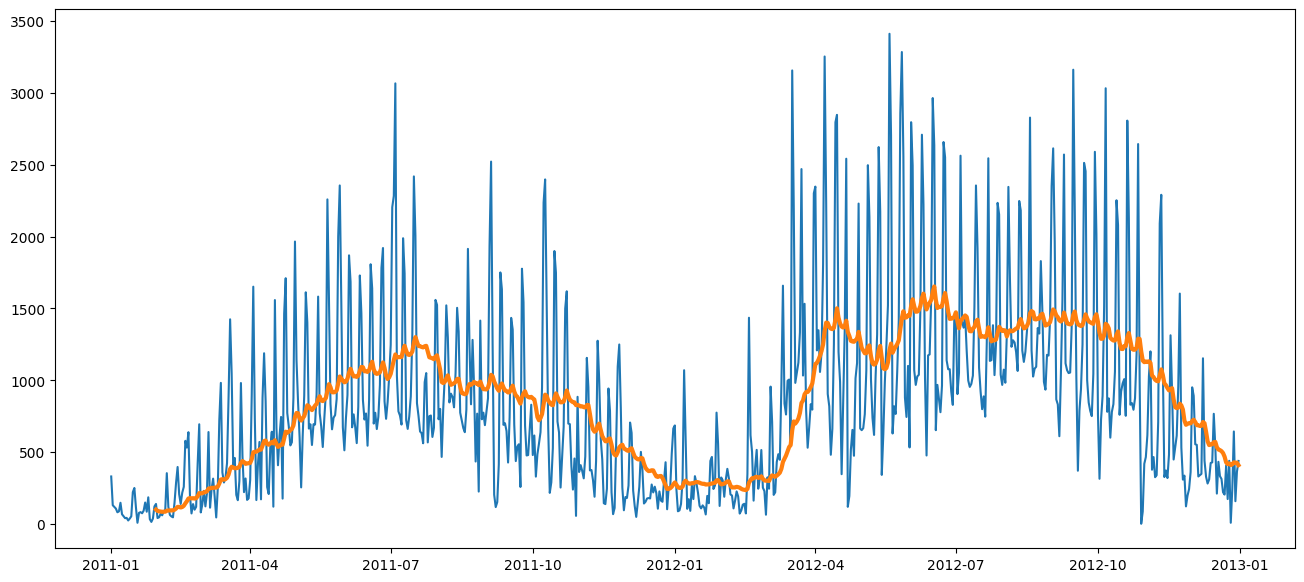

In [167]:
plt.figure(figsize=(16,7))
plt.plot(bike_data_raw['dteday'],bike_data_raw['rentals'],label="liczba wypożyczeń")
plt.plot(bike_data_raw['dteday'],bike_data_raw['rentals'].rolling(30).mean(),linewidth=3.0, label='30 dniowa średnia krocząca')

In [168]:
print('Przed usunieciem:')
display(bike_data_raw)
print("Po usunieciu:")
bike_data = bike_data_raw.copy()
bike_data.drop(['instant','dteday','yr'],axis=1, inplace=True)
display(bike_data)

Przed usunieciem:


instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1 2011-01-01       1   0     1        0        6           0   
1          2 2011-01-02       1   0     1        0        0           0   
2          3 2011-01-03       1   0     1        0        1           1   
3          4 2011-01-04       1   0     1        0        2           1   
4          5 2011-01-05       1   0     1        0        3           1   
..       ...        ...     ...  ..   ...      ...      ...         ...   
726      727 2012-12-27       1   1    12        0        4           1   
727      728 2012-12-28       1   1    12        0        5           1   
728      729 2012-12-29       1   1    12        0        6           0   
729      730 2012-12-30       1   1    12        0        0           0   
730      731 2012-12-31       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspeed  rentals  
0             2  0.344167  0.363625  0.805833   0.160446      331  
1             2  0.363478  0.353739  0.696087   0.248539      131  
2             1  0.196364  0.189405  0.437273   0.248309      120  
3             1  0.200000  0.212122  0.590435   0.160296      108  
4             1  0.226957  0.229270  0.436957   0.186900       82  
..          ...       ...       ...       ...        ...      ...  
726           2  0.254167  0.226642  0.652917   0.350133      247  
727           2  0.253333  0.255046  0.590000   0.155471      644  
728           2  0.253333  0.242400  0.752917   0.124383      159  
729           1  0.255833  0.231700  0.483333   0.350754      364  
730           2  0.215833  0.223487  0.577500   0.154846      439  

[731 rows x 14 columns]

Po usunieciu:


season  mnth  holiday  weekday  workingday  weathersit      temp  \
0         1     1        0        6           0           2  0.344167   
1         1     1        0        0           0           2  0.363478   
2         1     1        0        1           1           1  0.196364   
3         1     1        0        2           1           1  0.200000   
4         1     1        0        3           1           1  0.226957   
..      ...   ...      ...      ...         ...         ...       ...   
726       1    12        0        4           1           2  0.254167   
727       1    12        0        5           1           2  0.253333   
728       1    12        0        6           0           2  0.253333   
729       1    12        0        0           0           1  0.255833   
730       1    12        0        1           1           2  0.215833   

        atemp       hum  windspeed  rentals  
0    0.363625  0.805833   0.160446      331  
1    0.353739  0.696087   0.248539      131  
2    0.189405  0.437273   0.248309      120  
3    0.212122  0.590435   0.160296      108  
4    0.229270  0.436957   0.186900       82  
..        ...       ...        ...      ...  
726  0.226642  0.652917   0.350133      247  
727  0.255046  0.590000   0.155471      644  
728  0.242400  0.752917   0.124383      159  
729  0.231700  0.483333   0.350754      364  
730  0.223487  0.577500   0.154846      439  

[731 rows x 11 columns]

In [169]:
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
categorical_features = ['season','mnth','holiday','weekday','workingday','weathersit']
target = 'rentals'

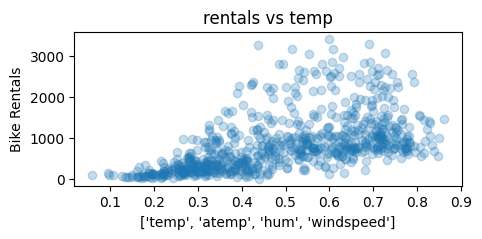

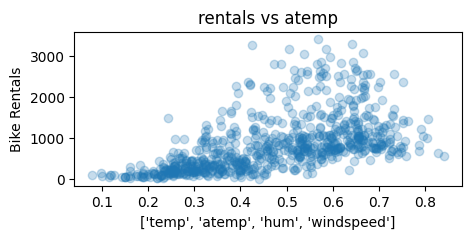

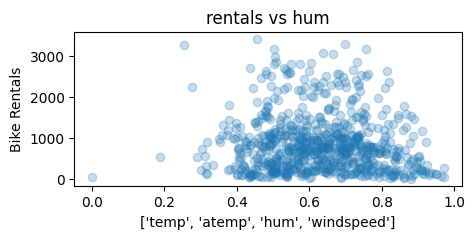

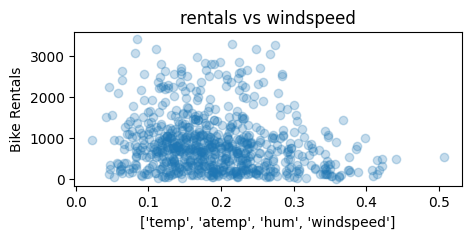

In [170]:
for numeric_feature in numeric_features:
    fig=plt.figure(figsize=(5,2))
    plt.scatter(bike_data[numeric_feature],bike_data[target], alpha=0.25)
    plt.xlabel(numeric_features)
    plt.ylabel('Bike Rentals')
    plt.title(f'rentals vs {numeric_feature}')
    plt.show()
    
    

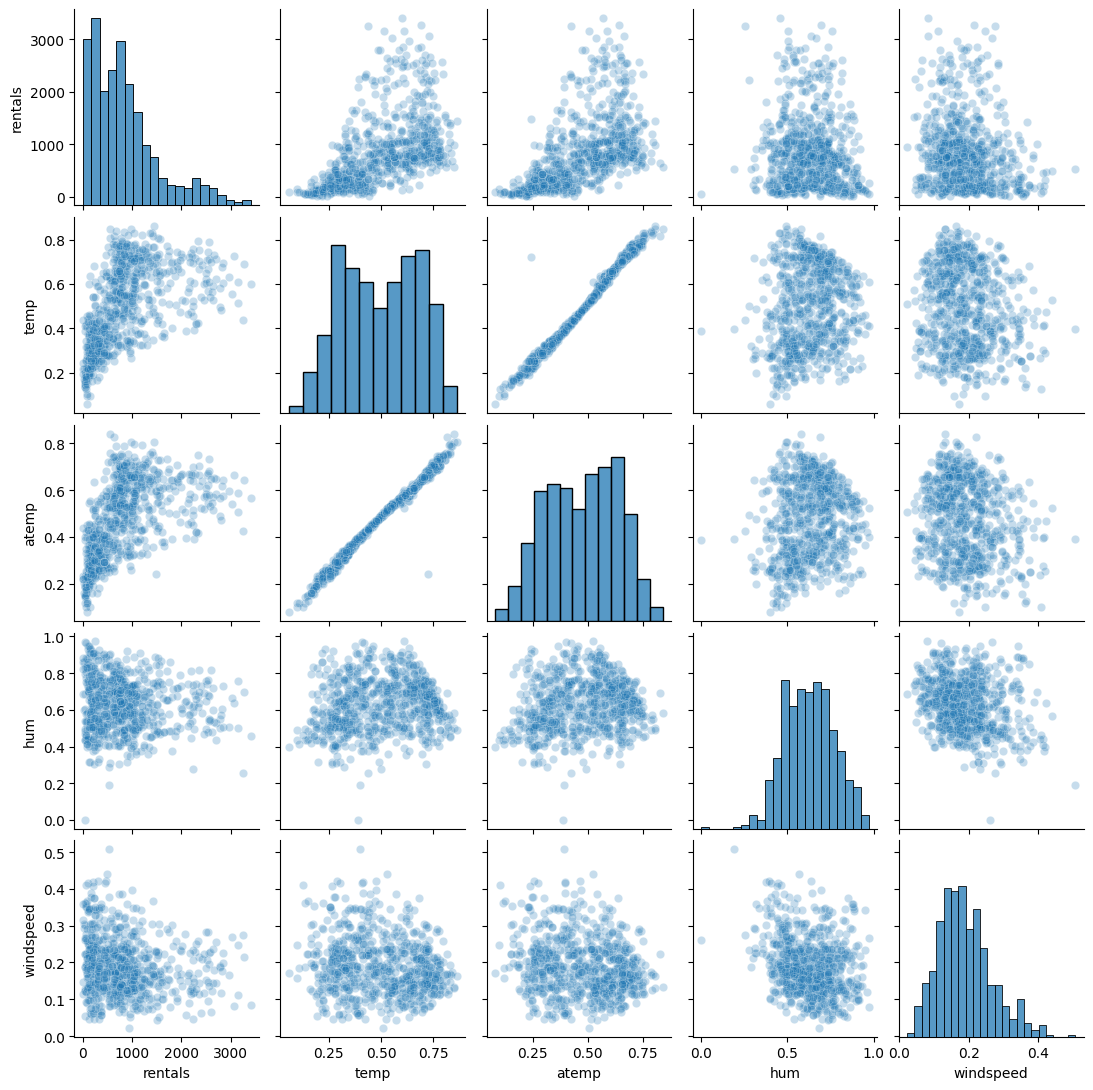

In [171]:
fig = sns.pairplot(bike_data[[target]+numeric_features], kind='scatter', plot_kws={'alpha': 0.25})
fig.fig.set_size_inches(11,11) #ustawiamy rozmiar wykresu
plt.show()

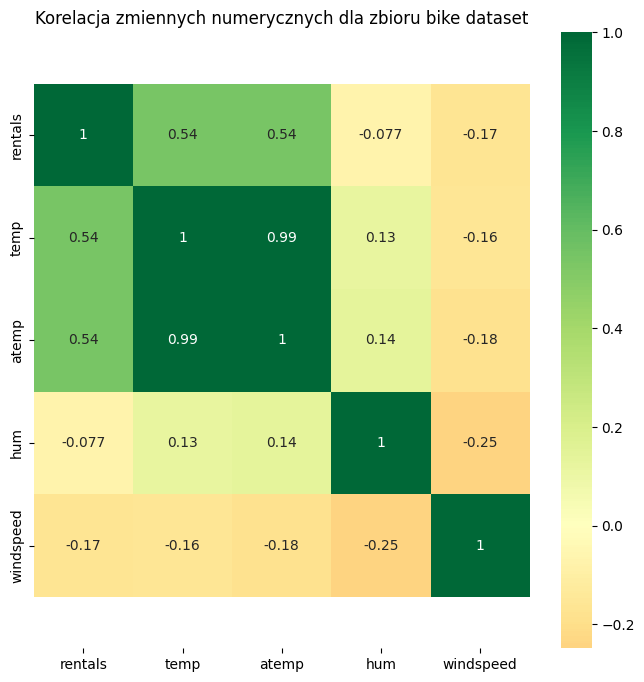

In [172]:
plt.figure(figsize=(8, 8))
ax = sns.heatmap(bike_data[[target]+numeric_features].corr(),
                 xticklabels=bike_data[[target]+numeric_features].corr().columns,
                 yticklabels=bike_data[[target]+numeric_features].corr().columns,
                 cmap='RdYlGn',
                 center=0,
                 annot=True)

plt.title('Korelacja zmiennych numerycznych dla zbioru bike dataset', fontsize=12)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [173]:
bike_data['difference_temp'] = (bike_data['atemp'] - bike_data['temp'])/bike_data['temp']
bike_data.drop(['atemp'], axis=1, inplace=True)
numeric_features = ['temp', 'difference_temp', 'hum', 'windspeed']
bike_data[['rentals', 'temp', 'difference_temp']].corr()

rentals      temp  difference_temp
rentals          1.000000  0.543285        -0.310423
temp             0.543285  1.000000        -0.599254
difference_temp -0.310423 -0.599254         1.000000

C:\Users\monas\AppData\Local\Temp\ipykernel_10944\2115851665.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=bike_data[target], x=bike_data[categoric_features], palette="Set2")


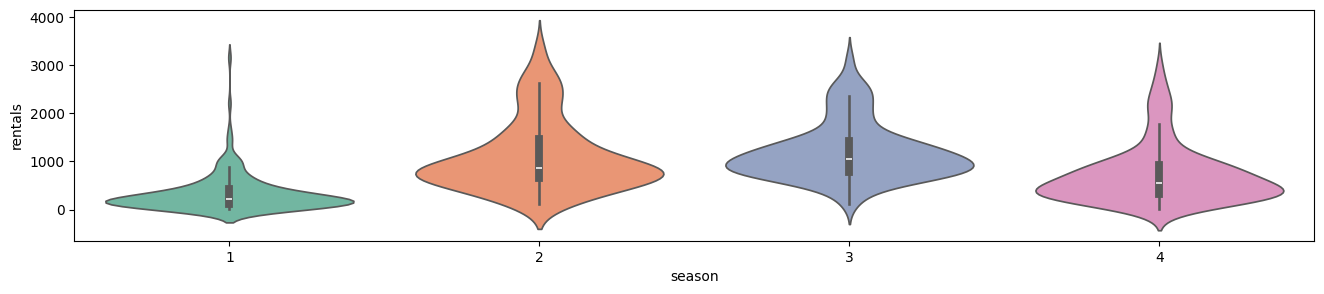

C:\Users\monas\AppData\Local\Temp\ipykernel_10944\2115851665.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=bike_data[target], x=bike_data[categoric_features], palette="Set2")


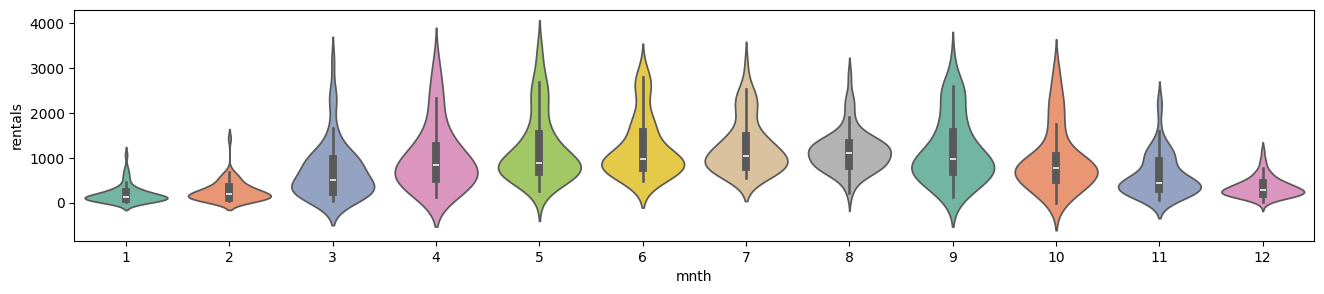

C:\Users\monas\AppData\Local\Temp\ipykernel_10944\2115851665.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=bike_data[target], x=bike_data[categoric_features], palette="Set2")


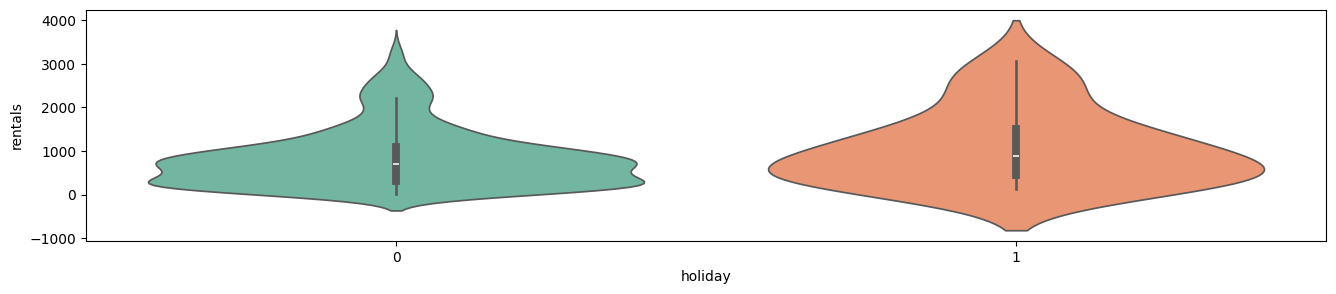

C:\Users\monas\AppData\Local\Temp\ipykernel_10944\2115851665.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=bike_data[target], x=bike_data[categoric_features], palette="Set2")


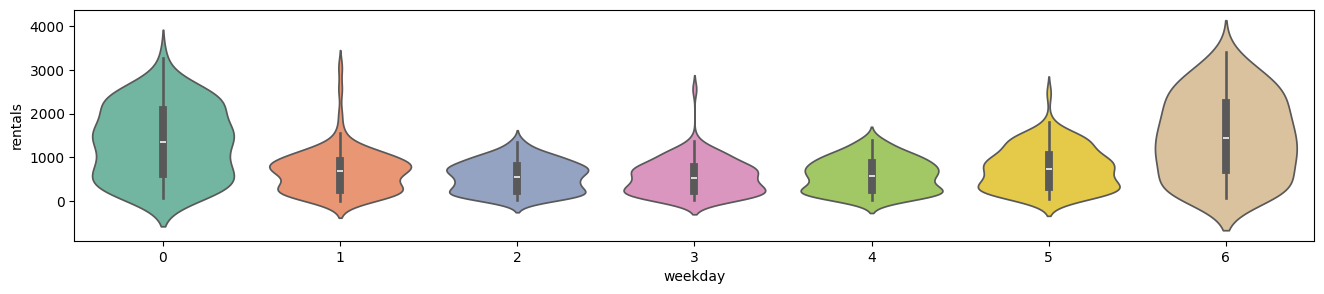

C:\Users\monas\AppData\Local\Temp\ipykernel_10944\2115851665.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=bike_data[target], x=bike_data[categoric_features], palette="Set2")


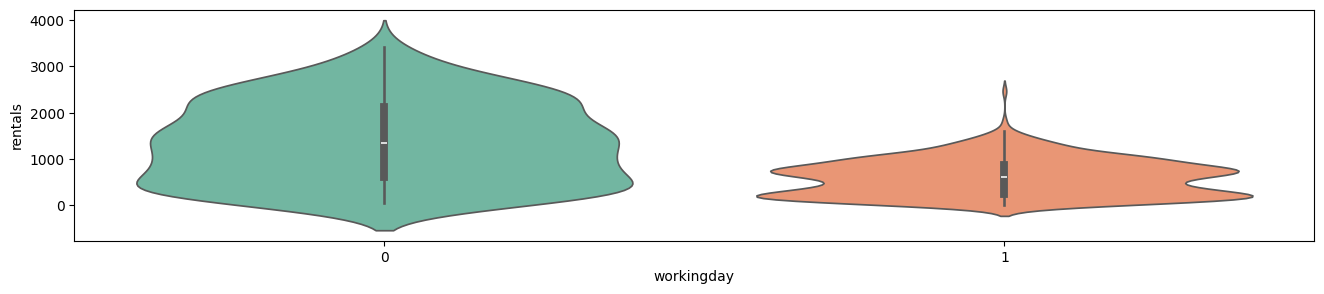

C:\Users\monas\AppData\Local\Temp\ipykernel_10944\2115851665.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=bike_data[target], x=bike_data[categoric_features], palette="Set2")


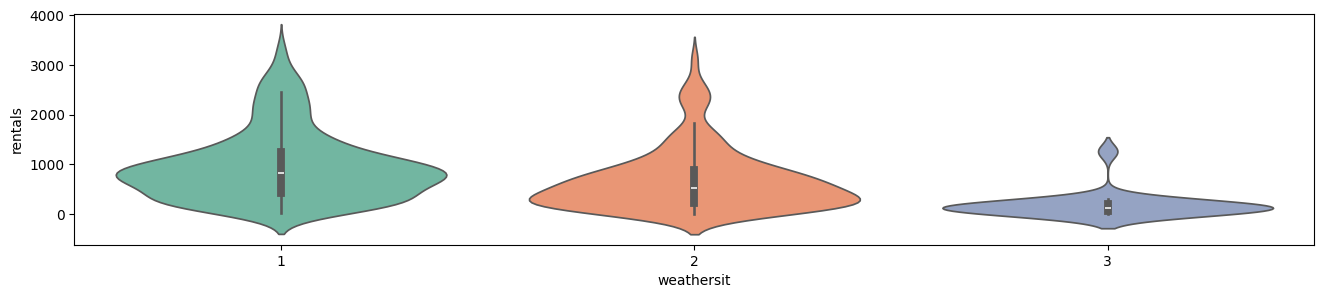

In [174]:
for categoric_features in categorical_features:
    plt.figure(figsize=(16, 3))
    sns.violinplot(y=bike_data[target], x=bike_data[categoric_features], palette="Set2")
    plt.show()

# część 2

In [175]:
print(f'Numeric features: {numeric_features}')
print(f'Categorical features: {categorical_features}')
print(f'Target: {target}')
display(bike_data)

Numeric features: ['temp', 'difference_temp', 'hum', 'windspeed']
Categorical features: ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
Target: rentals


season  mnth  holiday  weekday  workingday  weathersit      temp  \
0         1     1        0        6           0           2  0.344167   
1         1     1        0        0           0           2  0.363478   
2         1     1        0        1           1           1  0.196364   
3         1     1        0        2           1           1  0.200000   
4         1     1        0        3           1           1  0.226957   
..      ...   ...      ...      ...         ...         ...       ...   
726       1    12        0        4           1           2  0.254167   
727       1    12        0        5           1           2  0.253333   
728       1    12        0        6           0           2  0.253333   
729       1    12        0        0           0           1  0.255833   
730       1    12        0        1           1           2  0.215833   

          hum  windspeed  rentals  difference_temp  
0    0.805833   0.160446      331         0.056537  
1    0.696087   0.248539      131        -0.026794  
2    0.437273   0.248309      120        -0.035439  
3    0.590435   0.160296      108         0.060610  
4    0.436957   0.186900       82         0.010191  
..        ...        ...      ...              ...  
726  0.652917   0.350133      247        -0.108295  
727  0.590000   0.155471      644         0.006762  
728  0.752917   0.124383      159        -0.043157  
729  0.483333   0.350754      364        -0.094331  
730  0.577500   0.154846      439         0.035463  

[731 rows x 11 columns]

In [176]:
X = bike_data[['temp']].copy()
y = bike_data[target].copy()
print('x:')
print(X.values[:3])
print('\ny:')
print(y.values[:3])

x:
[[0.344167]
 [0.363478]
 [0.196364]]

y:
[331 131 120]


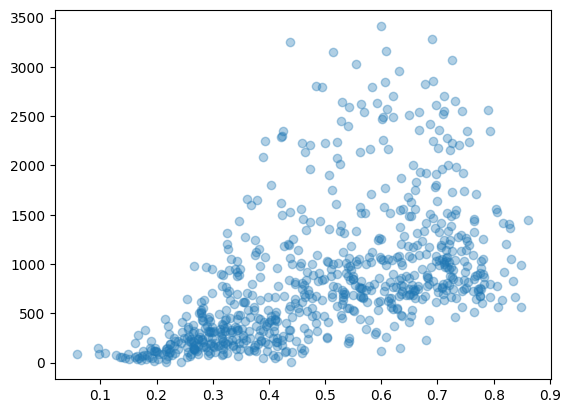

In [177]:
plt.scatter(X,y, alpha=0.35)
plt.show()

In [178]:
# podział zbioru na częśc treningową i testową
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size =0.2, shuffle=False)
print(f'X.shape: {X.shape}, y.shape {y.shape}')
print()
print(f'X_train.shape: {X_train.shape}, y_train.shape {y_train.shape}')
print(f'X_test.shape: {X_test.shape}, y_test.shape {y_test.shape}')

X.shape: (731, 1), y.shape (731,)

X_train.shape: (584, 1), y_train.shape (584,)
X_test.shape: (147, 1), y_test.shape (147,)


In [179]:
# import 
from sklearn.linear_model import LinearRegression

In [180]:
# tworzenie modelu regresji liniowej
lr_model = LinearRegression() #inicjalizacja
lr_model.fit(X_train,y_train) #trenowanie

LinearRegression()

In [181]:
lr_model.intercept_


-179.96286312537404

In [182]:
lr_model.coef_

array([1990.31869846])

In [183]:
import numpy as np
X_linspace = np.linspace(0,1,100)
y_fitted = lr_model.intercept_ + lr_model.coef_[0] * X_linspace


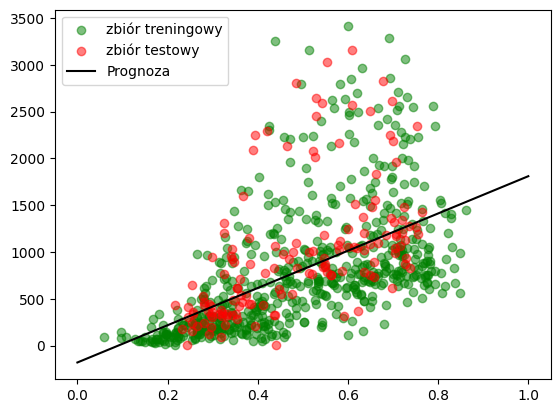

In [184]:
#rysowanie wykresu
plt.scatter(X_train,y_train, color='green', alpha=0.5, label='zbiór treningowy')
plt.scatter(X_test,y_test, color='red', alpha=0.5, label='zbiór testowy')
plt.plot(X_linspace, y_fitted, color='black', label='Prognoza')
plt.legend(loc='upper left')
plt.show()


In [185]:
#prognoza
X_new=[[0.3],[0.7]]
predicted_data = lr_model.predict(X_new)
print(predicted_data)

[ 417.13274641 1213.2602258 ]


c:\Users\monas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [186]:
# Ocena modeli
y_predict_train = lr_model.predict(X_train)
y_predict_test = lr_model.predict(X_test)

In [187]:
print("Predykcja: ")
print(np.round(y_predict_test[:5]).astype(int))
print("wartość prawdziwa: ")
print(y_test.values[:5])


Predykcja: 
[1285 1313 1324 1245 1198]
wartość prawdziwa: 
[1278 1263 1196 1065 2247]


In [188]:
#metryki

In [189]:
from sklearn.metrics import r2_score
print(f'Train r^2: {r2_score(y_train, y_predict_train)}')

Train r^2: 0.30617863454631344


In [190]:
# metryka MAE
from sklearn.metrics import mean_absolute_error

In [191]:
print(f'Train MAE: {mean_absolute_error(y_train, y_predict_train)}')
print(f'Test MAE: {mean_absolute_error(y_test, y_predict_test)}')

Train MAE: 404.8339599752615
Test MAE: 391.02879410802956


In [192]:
# MAPE - Mean absolute Percentage Error
from sklearn.metrics import mean_absolute_percentage_error

In [193]:
from sklearn.metrics import mean_absolute_percentage_error
print(f'Train MAPE: {mean_absolute_percentage_error(y_train, y_predict_train)}')
print(f'Test MAPE: {mean_absolute_percentage_error(y_test, y_predict_test)}')

Train MAPE: 0.9668581511778538
Test MAPE: 2.9864925318560496


In [194]:
# metryka MSE
from sklearn.metrics import mean_squared_error

In [195]:
print(f'Train MSE: {mean_squared_error(y_train, y_predict_train)}')
print(f'Test MSE: {mean_squared_error(y_test, y_predict_test)}')

Train MSE: 317745.94124252343
Test MSE: 397066.9447179113


In [196]:
#RMS - Root mean squared Error
from math import sqrt

In [197]:
print(f'Train RMSE: {sqrt(mean_squared_error(y_train, y_predict_train))}')
print(f'Test RMSE: {sqrt(mean_squared_error(y_test, y_predict_test))}')

Train RMSE: 563.6895787953894
Test RMSE: 630.1324818781454


In [198]:
# wizualna ocena modeli

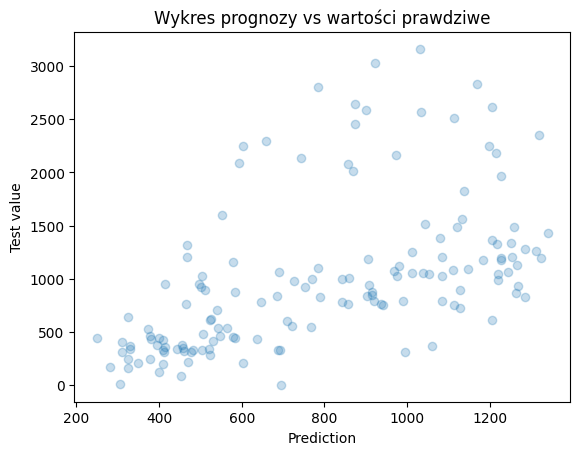

In [199]:
# porówanie wartości prawdziwej z predykcja
plt.scatter(y_predict_test, y_test, alpha=0.25)
#plt.axhline(y_fitted, color="r", linestyle="--")
plt.xlabel('Prediction')
plt.ylabel('Test value')
plt.title(f'Wykres prognozy vs wartości prawdziwe')
plt.show()


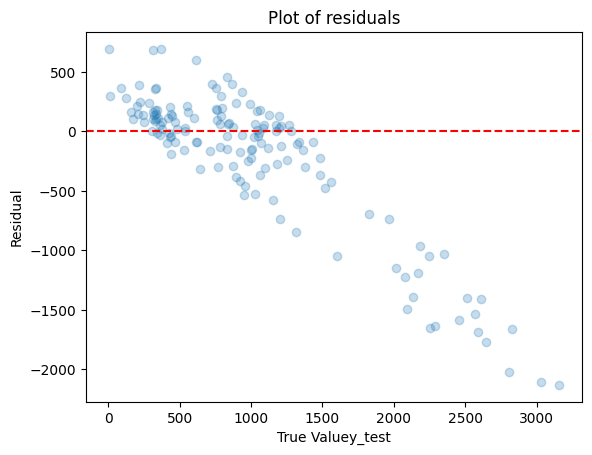

In [200]:
#wykres reszt
errors = y_predict_test - y_test
plt.scatter(x = y_test, y = errors, alpha=0.25)
plt.axhline(0, color="r", linestyle="--")
plt.xlabel('True Valuey_test')
plt.ylabel('Residual')
plt.title(f'Plot of residuals')
plt.show()

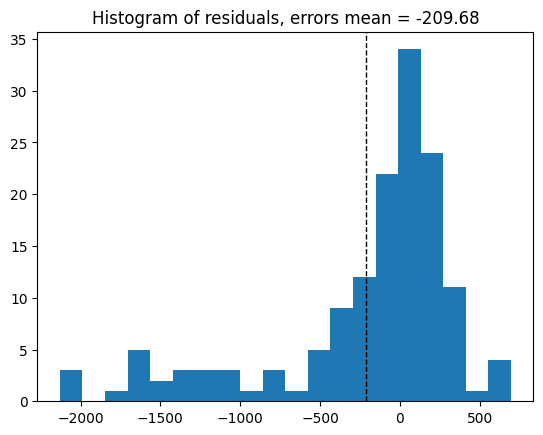

In [201]:
#Histogram reszt
plt.hist(errors, bins = 20)
plt.axvline(errors.mean(), color='k', linestyle='dashed', linewidth=1)
plt.title(f'Histogram of residuals, errors mean = {np.round(errors.mean(), 2)}')
plt.show()

# Regresja wielomianowa

In [202]:
from sklearn.preprocessing import PolynomialFeatures

In [203]:
# tworzymy puste listy gdzie umieszczane będą metryki oceniające
r_2_train_list = []
rmse_train_list = []
rmse_test_list = []

c:\Users\monas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


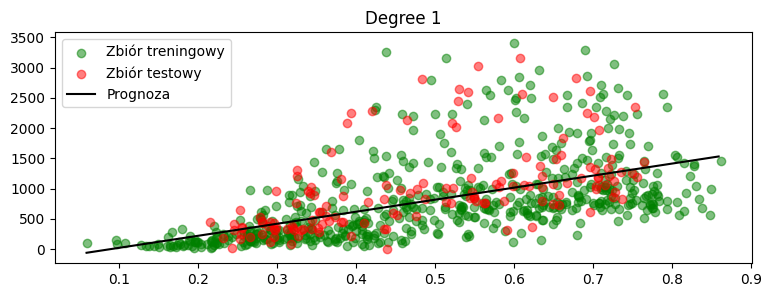

c:\Users\monas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


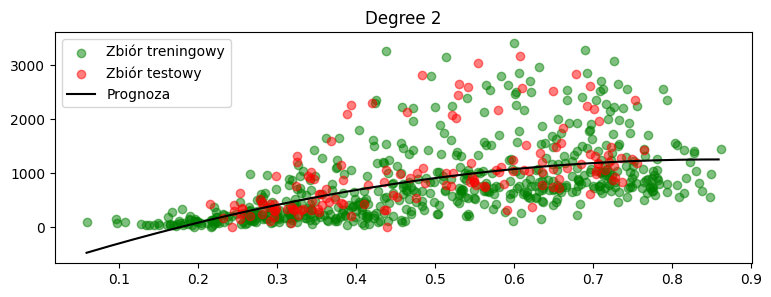

c:\Users\monas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


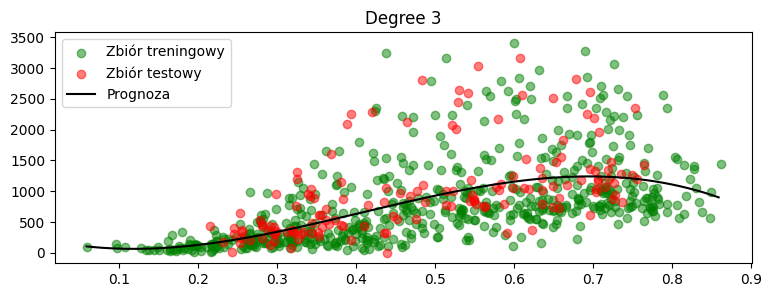

c:\Users\monas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


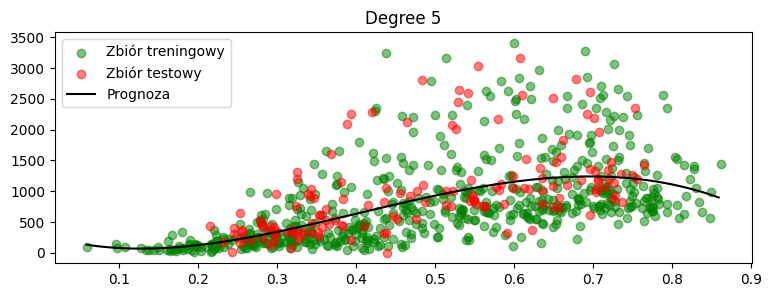

c:\Users\monas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


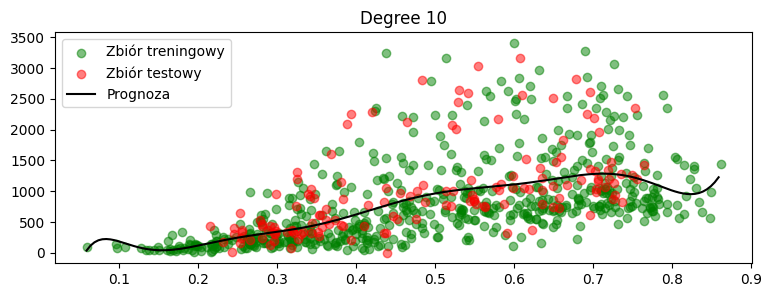

c:\Users\monas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


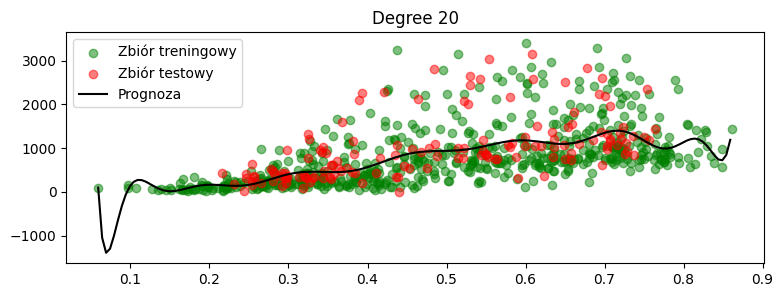

In [204]:
from sklearn.preprocessing import PolynomialFeatures

# tworzymy puste listy gdzie umieszczane będą metryki oceniające
r_2_train_list = []
rmse_train_list = []
rmse_test_list = []

# Tworzymy X, który zostanie wykorzystany dla wizualizacji naszego modelu
X_linespace = np.arange(X.min()[0], X.max()[0], step=0.005).reshape(-1, 1)
for degree in [1, 2, 3, 5, 10, 20]:

    # Transformacja naszego X
    poly_transformer = PolynomialFeatures(degree=degree)
    X_train_transformed = poly_transformer.fit_transform(X_train)

    # Trenowanie naszego modelu
    polynomial_regression = LinearRegression()
    polynomial_regression.fit(X_train_transformed, y_train)
    plt.figure(figsize=(9, 3))

    # Wizualizacja wartości ze zbioru treningowego oraz testowgo
    plt.scatter(X_train, y_train, color='green', alpha=0.5, label='Zbiór treningowy')
    plt.scatter(X_test, y_test, color='red', alpha=0.5, label='Zbiór testowy')

    ########## Wizualizacja wielomianu ##########
    y_fitted = polynomial_regression.predict(poly_transformer.transform(X_linespace))
    plt.plot(X_linespace, y_fitted, color='black', label='Prognoza')
    plt.title(f'Degree {degree}')
    plt.legend(loc='upper left')
    plt.show()

    # Predykcja modelu na zbiorze treningowym
    prediction_train = polynomial_regression.predict(X_train_transformed)

    # Predykcja modelu na zbiorze testowym - najpierw jednak należy przekształcić zbiór testowy
    X_test_transformed = poly_transformer.transform(X_test)
    prediction_test = polynomial_regression.predict(X_test_transformed)

    # Ocena modeli
    r_2_train_list.append(r2_score(y_train, prediction_train))
    rmse_train_list.append(sqrt(mean_squared_error(y_train, prediction_train)))
    rmse_test_list.append(sqrt(mean_squared_error(y_test, prediction_test)))

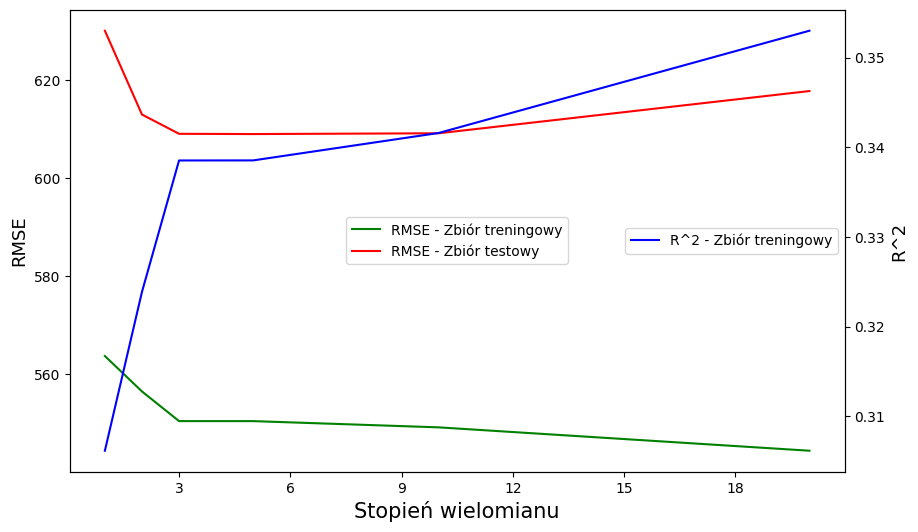

In [205]:
from matplotlib.ticker import MaxNLocator
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot()
ax.plot([1, 2, 3, 5, 10, 20], rmse_train_list, color='green', label='RMSE - Zbiór treningowy')
ax.plot([1, 2, 3, 5, 10, 20], rmse_test_list, color='red', label='RMSE - Zbiór testowy')
ax.legend(loc='center')
ax.xaxis.set_major_locator(MaxNLocator(integer=True)) # Ustawienie typu int dla wartości z osi X
ax.set_ylabel('RMSE', size=13)
ax.set_xlabel('Stopień wielomianu', size=15)

# Dodanie drugiej osi y dla R^2
ax2=ax.twinx()
ax2.plot([1, 2, 3, 5, 10, 20], r_2_train_list, color='blue', label='R^2 - Zbiór treningowy')
ax2.legend(loc='center right')
ax2.set_ylabel('R^2', size=13)

plt.show()

# Zbiór walidacyjny – sprawdzian krzyżowy

In [206]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=5, shuffle=False)

In [207]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

# Tworzymy Pipeline - najpierw tworzymy wielomian, następnie uczymy model
polynomial_regression_pipeline = make_pipeline(PolynomialFeatures(),
                                               LinearRegression())

# Nasz model sprawdzi te hiperparametry
params = {'polynomialfeatures__degree': [1, 2, 3, 4, 5]}

# Inicjalizujemy Pipeline
polynomial_regression_gridsearch = GridSearchCV(polynomial_regression_pipeline,
                                                params,
                                                scoring='neg_mean_squared_error', # wybrane będą takie hiperparametry, które dadzą najmniejszą wartość dla tego scoringu
                                                cv=cv)

# Uczymy Grid Search, podajemy X_train - Pipeline za nas zrobi wielomian :)
polynomial_regression_gridsearch.fit(X_train, y_train)
print("\nNajlepsze hiperparametry:", polynomial_regression_gridsearch.best_params_, "\n")

# Przekazujemy najlepszy estymator
polynomial_regression_model = polynomial_regression_gridsearch.best_estimator_
predictions = polynomial_regression_model.predict(X_test)
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, predictions))}')


Najlepsze hiperparametry: {'polynomialfeatures__degree': 3} 

RMSE: 609.076780249834


# Regresja wielu zmiennych


In [208]:
# Podział na zmienne objaśniające i zmienną objaśnianą
X = bike_data[numeric_features].copy()
y = bike_data[target].copy()

# Podział na zbiór treningowy i testowy (taki sam podział co poprzednio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Uczymy model
polynomial_regression_pipeline = make_pipeline(PolynomialFeatures(),
                                               LinearRegression())
params = {'polynomialfeatures__degree': [1, 2, 3, 4, 5]}
polynomial_regression_gridsearch = GridSearchCV(polynomial_regression_pipeline,
                                                params,
                                                scoring='neg_mean_squared_error', # wybrane będą takie hiperparametry które dadzą najmniejszą wartość dla tego scoringu
                                                cv=cv)

polynomial_regression_gridsearch.fit(X_train, y_train)
print("\nNajlepsze hiperparametry:", polynomial_regression_gridsearch.best_params_, "\n")

polynomial_regression_model = polynomial_regression_gridsearch.best_estimator_
predictions = polynomial_regression_model.predict(X_test)
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, predictions))}')


Najlepsze hiperparametry: {'polynomialfeatures__degree': 1} 

RMSE: 618.1519697010564


# Regularyzacja

In [209]:
# Importujemy regresję liniową z regularyzacją Lasso i Ridge
from sklearn.linear_model import ElasticNet

# Uczymy model
polynomial_regression_pipeline = make_pipeline(PolynomialFeatures(),
                                               ElasticNet())

params = {'polynomialfeatures__degree': [1, 2, 3, 4, 5],
          'elasticnet__alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0],
          'elasticnet__l1_ratio': np.arange(0, 1.1, 0.1)}

polynomial_regression_gridsearch = GridSearchCV(polynomial_regression_pipeline,
                                                params,
                                                scoring='neg_mean_squared_error', # wybrane będą takie hiperparametry które dadzą najmniejszą wartość dla tego scoringu
                                                cv=cv)

polynomial_regression_gridsearch.fit(X_train, y_train)
print("\nNajlepsze hiperparametry:", polynomial_regression_gridsearch.best_params_, "\n")

polynomial_regression_model = polynomial_regression_gridsearch.best_estimator_
predictions = polynomial_regression_model.predict(X_test)
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, predictions))}')

c:\Users\monas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.181e+07, tolerance: 2.207e+04
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
c:\Users\monas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.663e+07, tolerance: 2.268e+04
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of th


Najlepsze hiperparametry: {'elasticnet__alpha': 1.0, 'elasticnet__l1_ratio': 1.0, 'polynomialfeatures__degree': 5} 

RMSE: 584.8854667922697


# wykorzystanie zmiennych kategorycznych

In [210]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [211]:


from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet

In [212]:


# Podział na zmienne objaśniające i zmienną objaśnianą
X = bike_data[numeric_features+categorical_features].copy()
y = bike_data[target].copy()

# Podział na zbiór treningowy i testowy (taki sam podział co poprzednio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
numeric_transformer = Pipeline(steps=[
    ('logtransformer', PowerTransformer()),
    ('standardscaler', StandardScaler()),
    ('polynomialfeatures', PolynomialFeatures())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Tworzenie końcowego Pipeline, który będziemy trenować
final_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('regressor', ElasticNet())])

params = {'preprocessor__num__polynomialfeatures__degree': [1, 2, 3, 4, 5],
          'regressor__alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0],
          'regressor__l1_ratio': np.arange(0, 1.1, 0.1)}

final_polynomial_regression_gridsearch = GridSearchCV(final_pipeline,
                                                      params,
                                                      scoring='neg_mean_squared_error',
                                                      cv=cv)

final_polynomial_regression_gridsearch.fit(X_train, y_train)
print("\nNajlepsze hiperparametry:", final_polynomial_regression_gridsearch.best_params_, "\n")

final_polynomial_regression_model = final_polynomial_regression_gridsearch.best_estimator_

predictions2 = final_polynomial_regression_model.predict(X_train)
print(f'RMSE train: {np.sqrt(mean_squared_error(y_train, predictions2))}')

predictions = final_polynomial_regression_model.predict(X_test)
print(f'RMSE test: {np.sqrt(mean_squared_error(y_test, predictions))}')



c:\Users\monas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.169e+07, tolerance: 2.207e+04
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
c:\Users\monas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.884e+07, tolerance: 2.268e+04
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of th


Najlepsze hiperparametry: {'preprocessor__num__polynomialfeatures__degree': 1, 'regressor__alpha': 0.1, 'regressor__l1_ratio': 0.4} 

RMSE train: 369.99696379840697
RMSE test: 483.937941929758


# zadanie 13_5

In [213]:
from sklearn.metrics import r2_score
print(f'train r^2: {r2_score(y_train, predictions2)}')
print(f'test r^2: {r2_score(y_test, predictions)}')

train r^2: 0.7010738022482775
test r^2: 0.5246818851782763


In [214]:
# metryka MAE
from sklearn.metrics import mean_absolute_error
print(f'Train MAE: {mean_absolute_error(y_train, predictions2)}')
print(f'Test MAE: {mean_absolute_error(y_test, predictions)}')

Train MAE: 261.2984277940704
Test MAE: 348.58519383066186


In [215]:
# metryka MAPE
from sklearn.metrics import mean_absolute_percentage_error
print(f'Train MAPE: {mean_absolute_percentage_error(y_train, predictions2)}')
print(f'Test MAPE: {mean_absolute_percentage_error(y_test, predictions)}')

Train MAPE: 0.744318787353498
Test MAPE: 0.8593319615123957


In [216]:
# metryka MSE
from sklearn.metrics import mean_squared_error
print(f'Train MSE: {mean_squared_error(y_train, predictions2)}')
print(f'Test MSE: {mean_squared_error(y_test, predictions)}')

Train MSE: 136897.75322003968
Test MSE: 234195.9316392098


In [217]:
#RMS - Root mean squared Error
from math import sqrt
print(f'Train RMSE: {sqrt(mean_squared_error(y_train, predictions2))}')
print(f'Test RMSE: {sqrt(mean_squared_error(y_test, predictions))}')

Train RMSE: 369.99696379840697
Test RMSE: 483.937941929758


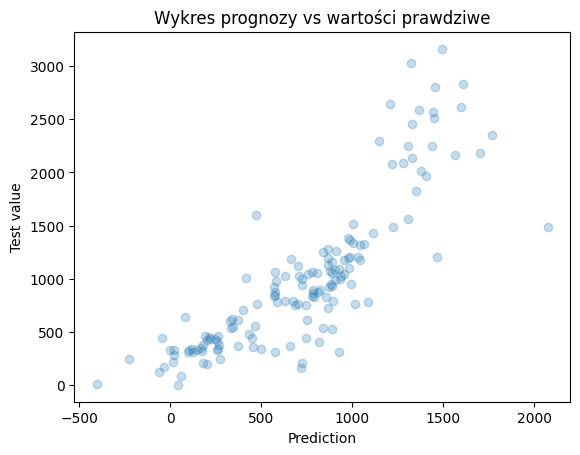

In [218]:
# porówanie wartości prawdziwej z predykcja
plt.scatter(predictions, y_test, alpha=0.25)
#plt.axhline(y_fitted, color="r", linestyle="--")
plt.xlabel('Prediction')
plt.ylabel('Test value')
plt.title(f'Wykres prognozy vs wartości prawdziwe')
plt.show()

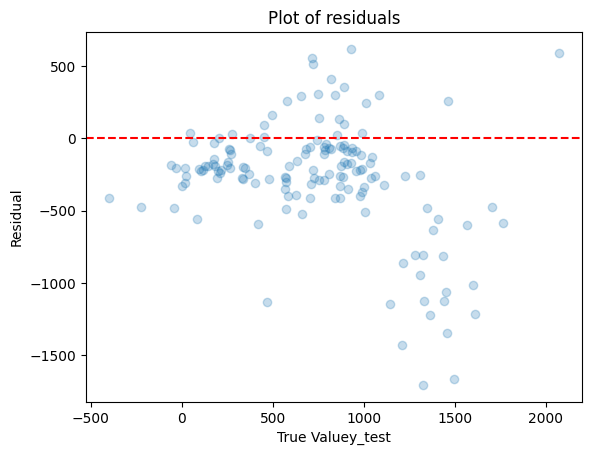

In [219]:
#wykres reszt
errors = predictions - y_test
plt.scatter(x = predictions, y = errors, alpha=0.25)
plt.axhline(0, color="r", linestyle="--")
plt.xlabel('True Valuey_test')
plt.ylabel('Residual')
plt.title(f'Plot of residuals')
plt.show()

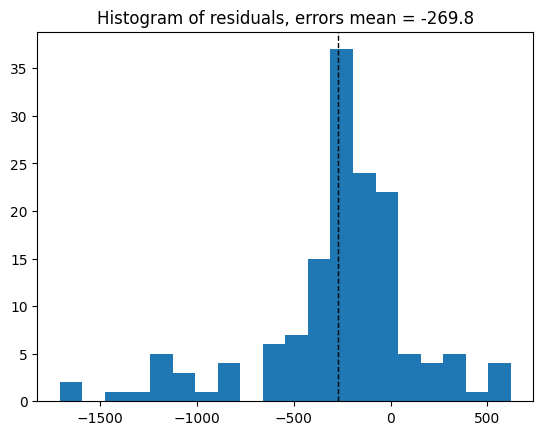

In [220]:
#Histogram reszt
plt.hist(errors, bins = 20)
plt.axvline(errors.mean(), color='k', linestyle='dashed', linewidth=1)
plt.title(f'Histogram of residuals, errors mean = {np.round(errors.mean(), 2)}')
plt.show()

# Porównanie metryk


#### metryka r2_score  - r^2 Współczynnik determinacji

Model 1 - regresja liniowa <br>
Train r^2: 0.30617863454631344 <br>
Test r^2: 0.19412301357953676  <br>

Model 2 <br>
train r^2: 0.7010738022482775  <br>
test r^2: 0.5246818851782763   <br>

Model 1 bardzo słabo dopasowuje wartości, dla danych treningowych to tylko 31%, a dla danychch testowych jest to jeszcze mniejsza wartość 19% <br>
Model 2 znacznie lepiej radzi sobie, dla danych traningowych to 70%, a dla testowych to 52%

#### metryka MAE - Mean Absolute Error

Model1 <br>
Train MAE: 404.8339599752615 <br>
Test MAE: 391.02879410802956

Model 2 <br>
Train MAE: 261.2984277940704 <br>
Test MAE: 348.58519383066186 <br>

wyniki  MAE dla 2giego model znów są lepsze od wyników dla modelu 1. model drugi podczas fazy treningu myli sie 261 co jest znacznie lepszym rezultatem niż w przypadku modelu 1, ktory myli sie 404, rownież w fazie testu model 1 lepiej przewiduje wyniki  -348 błedów vs 391 błedów dla modelu 1.
podobnie jak metyk r^2, metryka MAE pokazuje, że model 2 lepiej generalizuje.

#### metryka MSE - Mean Squared Error/ średni błąd kwadratowy

Model 1 <br>
Train MSE: 317745.94124252343 <br>
Test MSE: 397066.9447179113

Model 2 <br>
Train MSE: 136897.75322003968 <br>
Test MSE: 234195.9316392098

Model 2 wypada lepiej, w przypadku zbioru treningowego ma bład mniejszy o 57%, zas w przypadku zbioru testowego bład jest mniejszy o ok. 41%

#### MAPE - Mean Absolute Percentage Error

Train MAPE: 0.9668581511778538 <br>
Test MAPE: 2.9864925318560496

Train MAPE: 0.744318787353498 <br>
Test MAPE: 0.8593319615123957

Model 1 jest zdecydowanie gorszy, wskaznik MAPE w przypadku zbioru tstowego jest 3 krotnie  gorszy niz w przypadku zbioru treningowego Model 2 ma znacznie bardziej zblizone wyniki dla zbiory treningowego i testowego - 0.74 vs 0.86.
    Model 2 jest zdecydowanie lepszy

#### Model 1 jest zdecydowanie gorzy, ma duże błedy i słaba predykcję <br>
#### Model 2 daje znacznie mniejsze błedy i lepsze przewidywania

# zad 16-5               analiza regresji z PCA

1. Wykorzystane danych przygotowanych w zadaniu 13-5

In [221]:
bike_data.head()

season  mnth  holiday  weekday  workingday  weathersit      temp       hum  \
0       1     1        0        6           0           2  0.344167  0.805833   
1       1     1        0        0           0           2  0.363478  0.696087   
2       1     1        0        1           1           1  0.196364  0.437273   
3       1     1        0        2           1           1  0.200000  0.590435   
4       1     1        0        3           1           1  0.226957  0.436957   

   windspeed  rentals  difference_temp  
0   0.160446      331         0.056537  
1   0.248539      131        -0.026794  
2   0.248309      120        -0.035439  
3   0.160296      108         0.060610  
4   0.186900       82         0.010191

In [222]:

bike_data.describe()

season        mnth     holiday     weekday  workingday  weathersit  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     2.496580    6.519836    0.028728    2.997264    0.683995    1.395349   
std      1.110807    3.451913    0.167155    2.004787    0.465233    0.544894   
min      1.000000    1.000000    0.000000    0.000000    0.000000    1.000000   
25%      2.000000    4.000000    0.000000    1.000000    0.000000    1.000000   
50%      3.000000    7.000000    0.000000    3.000000    1.000000    1.000000   
75%      3.000000   10.000000    0.000000    5.000000    1.000000    2.000000   
max      4.000000   12.000000    1.000000    6.000000    1.000000    3.000000   

             temp         hum   windspeed      rentals  difference_temp  
count  731.000000  731.000000  731.000000   731.000000       731.000000  
mean     0.495385    0.627894    0.190486   848.176471        -0.030268  
std      0.183051    0.142429    0.077498   686.622488         0.055104  
min      0.059130    0.000000    0.022392     2.000000        -0.664885  
25%      0.337083    0.520000    0.134950   315.500000        -0.063885  
50%      0.498333    0.626667    0.180975   713.000000        -0.032756  
75%      0.655417    0.730209    0.233214  1096.000000        -0.008125  
max      0.861667    0.972500    0.507463  3410.000000         0.337207

 korelacja Persona

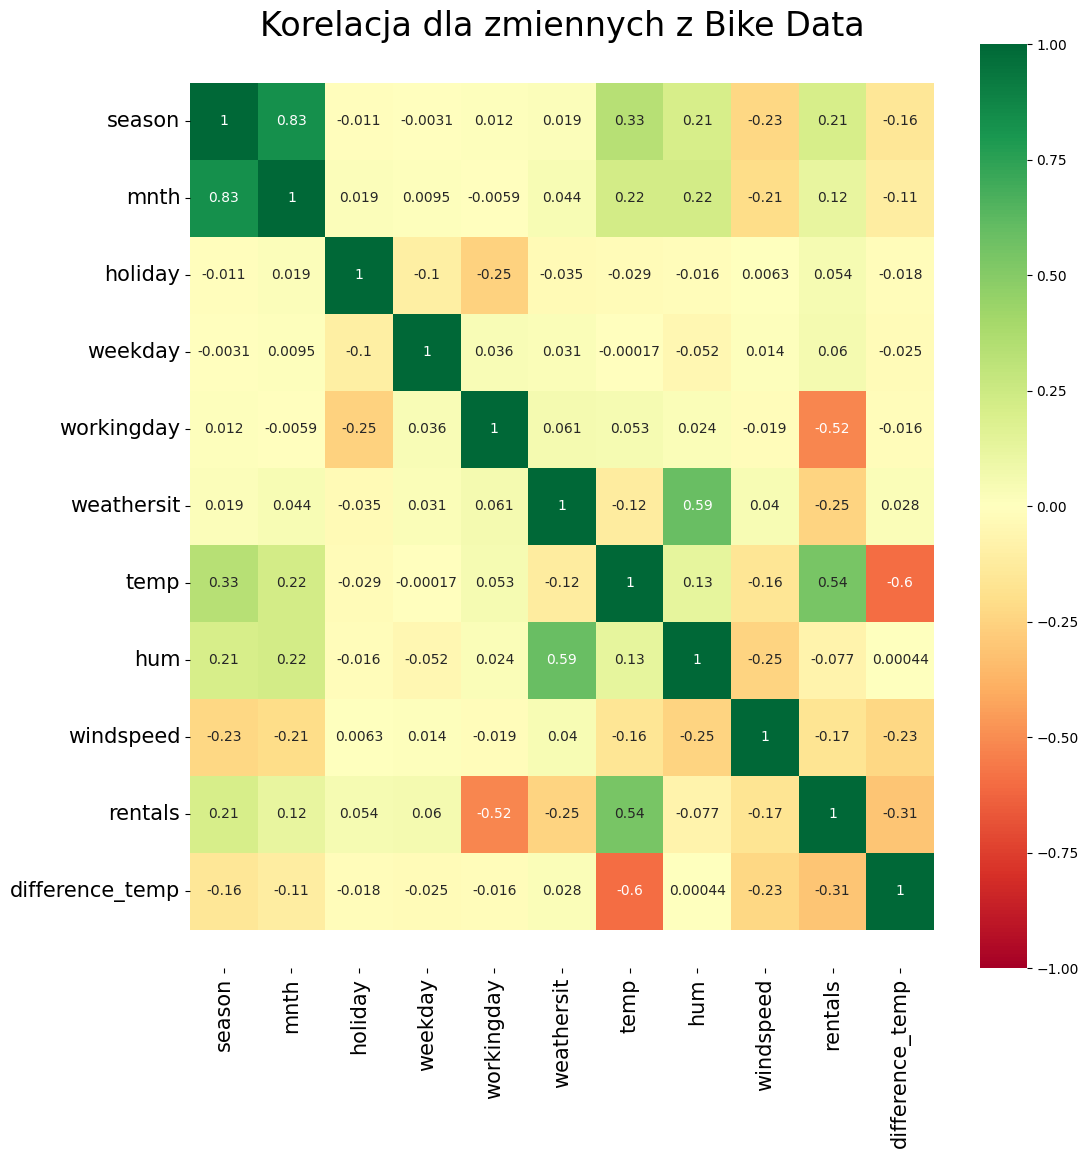

In [223]:
plt.figure(figsize=(12, 12))
ax = sns.heatmap(bike_data.corr(),
                 xticklabels=bike_data.columns,
                 yticklabels=bike_data.columns,
                 cmap='RdYlGn',
                 center=0,
                 annot=True,
                 vmin=-1,
                 vmax= 1)

plt.title('Korelacja dla zmiennych z Bike Data', fontsize=24)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.yticks(rotation=0) 
plt.show()

In [224]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
X = bike_data.drop('rentals', axis=1).copy()
y = bike_data['rentals'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
pca = PCA(random_state=42)
X_train_pca = pca.fit_transform(X_train_scaler)
train_bike_data = pd.DataFrame(np.concatenate([X_train_pca,
                          np.array(y_train).reshape(-1, 1)],
                          axis=1))
train_bike_data.rename(columns = {0: 'PC1', 1: 'PC2',
                             2: 'PC3', 3: 'PC4', 4: 'PC5', 5: 'PC6', 6: 'PC7', 7: 'PC8', 8: 'PC9',9: 'PC10', 10: 'rentals'},
                  inplace=True)
train_bike_data[['PC1', 'PC2','PC3','PC4','PC5', 'PC6','PC7','PC8','PC9','PC10']] = train_bike_data[['PC1', 'PC2','PC3', 'PC4','PC5', 'PC6','PC7','PC8','PC9','PC10']].astype(float)
train_bike_data.corr()

PC1           PC2           PC3           PC4           PC5  \
PC1      1.000000e+00  1.047725e-16  4.296994e-17  1.768334e-16  7.175997e-17   
PC2      1.047725e-16  1.000000e+00 -3.685801e-16  3.754788e-16  3.833475e-16   
PC3      4.296994e-17 -3.685801e-16  1.000000e+00 -1.388019e-16 -1.221785e-17   
PC4      1.768334e-16  3.754788e-16 -1.388019e-16  1.000000e+00  6.118890e-16   
PC5      7.175997e-17  3.833475e-16 -1.221785e-17  6.118890e-16  1.000000e+00   
PC6      1.227184e-16  2.126078e-16 -1.657599e-16 -2.124717e-18 -2.290510e-16   
PC7      1.176796e-16  5.593223e-17 -5.299144e-16 -5.044586e-16 -8.449812e-16   
PC8     -3.422586e-16 -1.602414e-15  2.921218e-16 -2.491552e-16 -4.710969e-16   
PC9     -6.310176e-16  1.303612e-16 -1.072737e-15 -1.313226e-16  5.239407e-17   
PC10    -2.628014e-16 -1.063786e-16 -2.902787e-16 -2.791301e-16 -3.118894e-16   
rentals  3.060569e-01 -3.854899e-01  1.509388e-01  1.051498e-01  2.780461e-02   

                  PC6           PC7           PC8           PC9          PC10  \
PC1      1.227184e-16  1.176796e-16 -3.422586e-16 -6.310176e-16 -2.628014e-16   
PC2      2.126078e-16  5.593223e-17 -1.602414e-15  1.303612e-16 -1.063786e-16   
PC3     -1.657599e-16 -5.299144e-16  2.921218e-16 -1.072737e-15 -2.902787e-16   
PC4     -2.124717e-18 -5.044586e-16 -2.491552e-16 -1.313226e-16 -2.791301e-16   
PC5     -2.290510e-16 -8.449812e-16 -4.710969e-16  5.239407e-17 -3.118894e-16   
PC6      1.000000e+00 -1.152450e-15  1.638672e-16  5.432086e-16  9.980531e-17   
PC7     -1.152450e-15  1.000000e+00 -2.104276e-17  1.472038e-16 -5.201101e-16   
PC8      1.638672e-16 -2.104276e-17  1.000000e+00 -3.968841e-16 -4.072495e-17   
PC9      5.432086e-16  1.472038e-16 -3.968841e-16  1.000000e+00  4.427466e-15   
PC10     9.980531e-17 -5.201101e-16 -4.072495e-17  4.427466e-15  1.000000e+00   
rentals  3.157464e-01 -4.943458e-01  1.318823e-02  1.911203e-01  2.711530e-02   

          rentals  
PC1      0.306057  
PC2     -0.385490  
PC3      0.150939  
PC4      0.105150  
PC5      0.027805  
PC6      0.315746  
PC7     -0.494346  
PC8      0.013188  
PC9      0.191120  
PC10     0.027115  
rentals  1.000000

Grupowanie cech

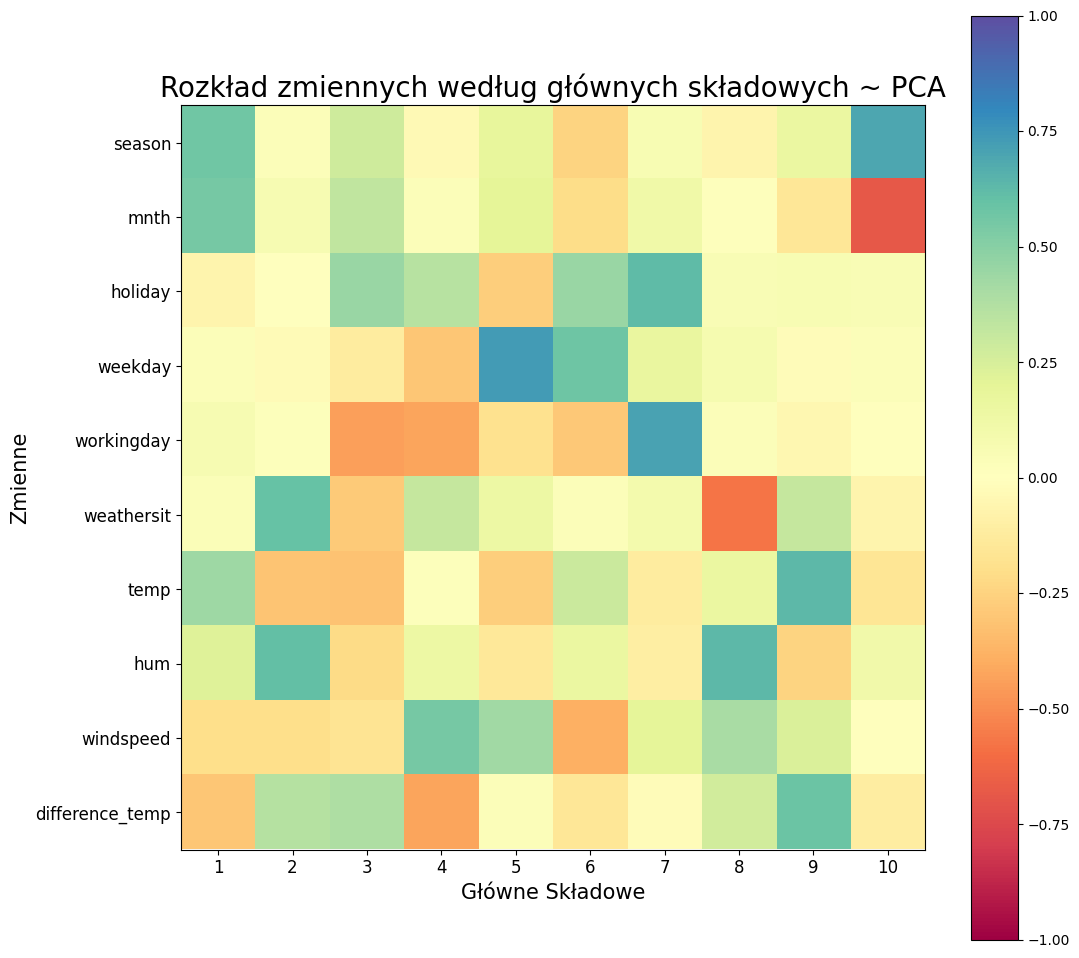

In [225]:
fig, ax = plt.subplots(figsize=(12, 12))
plt.imshow(pca.components_.T, cmap = 'Spectral', vmin =-1, vmax = 1)
plt.yticks(range(len(X_train.columns)), X_train.columns, fontsize=12)
plt.xticks(range(10), range(1, 11), fontsize=12)
plt.xlabel('Główne Składowe', fontsize=15)
plt.ylabel('Zmienne', fontsize=15)
plt.title('Rozkład zmiennych według głównych składowych ~ PCA', fontsize=20)
plt.colorbar()
plt.show()

Redukcja wymiaru bez znacznej utraty informacji

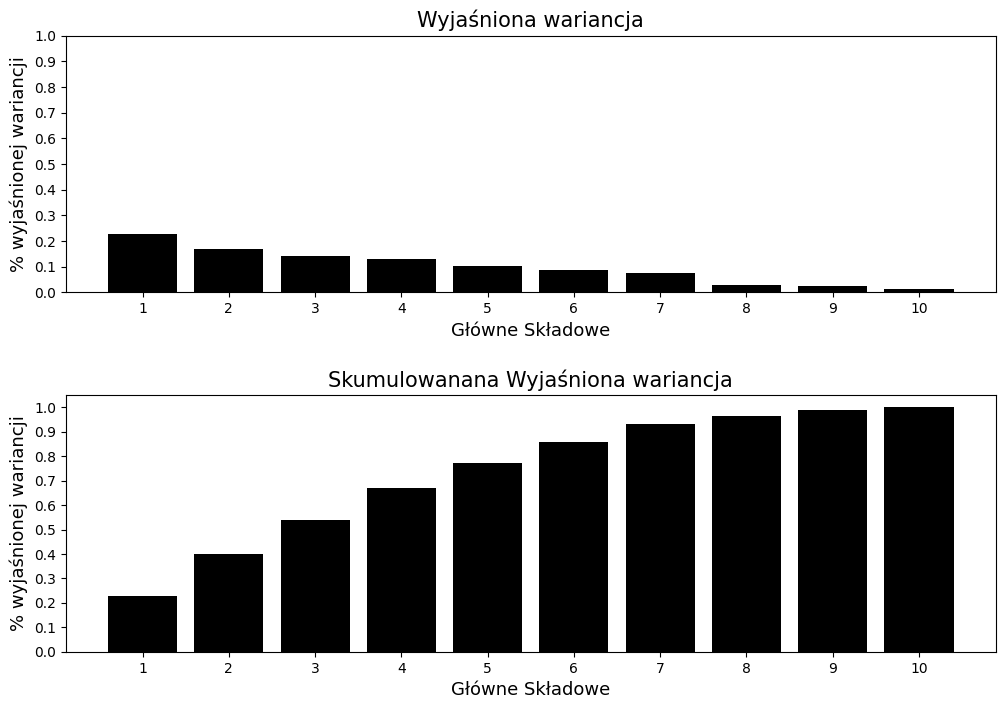

Główna składowa: 1, Wyjaśniona wariancja: 0.22916, Skumulowana Wyjaśniona wariancja: 0.22916
Główna składowa: 2, Wyjaśniona wariancja: 0.16907, Skumulowana Wyjaśniona wariancja: 0.39823
Główna składowa: 3, Wyjaśniona wariancja: 0.13996, Skumulowana Wyjaśniona wariancja: 0.53819
Główna składowa: 4, Wyjaśniona wariancja: 0.12956, Skumulowana Wyjaśniona wariancja: 0.66775
Główna składowa: 5, Wyjaśniona wariancja: 0.10417, Skumulowana Wyjaśniona wariancja: 0.77192
Główna składowa: 6, Wyjaśniona wariancja: 0.08603, Skumulowana Wyjaśniona wariancja: 0.85795
Główna składowa: 7, Wyjaśniona wariancja: 0.07568, Skumulowana Wyjaśniona wariancja: 0.93363
Główna składowa: 8, Wyjaśniona wariancja: 0.03007, Skumulowana Wyjaśniona wariancja: 0.9637
Główna składowa: 9, Wyjaśniona wariancja: 0.024, Skumulowana Wyjaśniona wariancja: 0.9877
Główna składowa: 10, Wyjaśniona wariancja: 0.0123, Skumulowana Wyjaśniona wariancja: 1.0


In [226]:
fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(wspace=.4, hspace=.4)
ax = fig.add_subplot(2, 1, 1)
ax.bar(range(1, 1+pca.n_components_), pca.explained_variance_ratio_, color='black')
ax.set(xticks=[1, 2, 3, 4,5,6,7,8,9,10])
plt.yticks(np.arange(0, 1.1, 0.1))
plt.title('Wyjaśniona wariancja', fontsize=15)
plt.xlabel('Główne Składowe', fontsize=13)
plt.ylabel('% wyjaśnionej wariancji', fontsize=13)
ax = fig.add_subplot(2, 1, 2)
ax.bar(range(1, 1+pca.n_components_), np.cumsum(pca.explained_variance_ratio_), color='black')
ax.set(xticks=[1, 2, 3, 4,5,6,7,8,9,10])
plt.yticks(np.arange(0, 1.1, 0.1))
plt.title('Skumulowanana Wyjaśniona wariancja', fontsize=15)
plt.xlabel('Główne Składowe', fontsize=13)
plt.ylabel('% wyjaśnionej wariancji', fontsize=13)
plt.show()

principal_component = 1
cum_explained_var = 0
for explained_var in pca.explained_variance_ratio_:
    cum_explained_var += explained_var
    print(f'Główna składowa: {principal_component}, Wyjaśniona wariancja: {np.round(explained_var, 5)}, Skumulowana Wyjaśniona wariancja: {np.round(cum_explained_var, 5)}')
    principal_component += 1

4 pierwsze glówne składowe wyjasniaja wariancje tylko w 66%; ale do budowanie modelu przyjmiemy te pierwsze 4.

In [227]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Podział na zmienne objaśniające i zmienną objaśnianą
X = bike_data[numeric_features].copy()
y = bike_data[target].copy()

# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Pipeline: standaryzacja -> PCA -> wielomiany -> regresja liniowa
polynomial_regression_pipeline = make_pipeline(
    StandardScaler(),
    PCA(n_components=4),  # tylko 4 główne składowe
    PolynomialFeatures(),
    LinearRegression()
)

# Parametry do GridSearch
params = {
    'polynomialfeatures__degree': [1, 2, 3, 4, 5]
}

# GridSearch z cross-validation
polynomial_regression_gridsearch = GridSearchCV(
    polynomial_regression_pipeline,
    params,
    scoring='neg_mean_squared_error',
    cv=cv
)

# Uczenie modelu
polynomial_regression_gridsearch.fit(X_train, y_train)

print("\nNajlepsze hiperparametry:", polynomial_regression_gridsearch.best_params_, "\n")

# Najlepszy model
polynomial_regression_model = polynomial_regression_gridsearch.best_estimator_

# Predykcje
predictions3 = polynomial_regression_model.predict(X_train)
predictions4 = polynomial_regression_model.predict(X_test)

# RMSE
print(f'RMSE train: {np.sqrt(mean_squared_error(y_train, predictions3))}')
print(f'RMSE test: {np.sqrt(mean_squared_error(y_test, predictions4))}')


Najlepsze hiperparametry: {'polynomialfeatures__degree': 1} 

RMSE train: 547.8561502226536
RMSE test: 618.1519697010561


In [228]:
from sklearn.metrics import r2_score
print(f'train r^2  train: {r2_score(y_train, predictions3)}')
print(f'test r^2  test: {r2_score(y_test, predictions4)}')

train r^2  train: 0.3446085969051067
test r^2  test: 0.22447547847760918


In [229]:
# metryka MAE
from sklearn.metrics import mean_absolute_error
print(f'Train MAE: {mean_absolute_error(y_train, predictions3)}')
print(f'Test MAE: {mean_absolute_error(y_test, predictions4)}')

Train MAE: 391.2226371605155
Test MAE: 381.754412349381


In [230]:
# metryka MAPE
from sklearn.metrics import mean_absolute_percentage_error
print(f'Train MAPE: {mean_absolute_percentage_error(y_train, predictions3)}')
print(f'Test MAPE: {mean_absolute_percentage_error(y_test, predictions4)}')

Train MAPE: 0.8571016356150253
Test MAPE: 1.2738849981779814


In [231]:
# metryka MSE
from sklearn.metrics import mean_squared_error
print(f'Train MSE: {mean_squared_error(y_train, predictions3)}')
print(f'Test MSE: {mean_squared_error(y_test, predictions4)}')

Train MSE: 300146.36133678677
Test MSE: 382111.8576452955


In [232]:
#RMS - Root mean squared Error
from math import sqrt
print(f'Train RMSE: {sqrt(mean_squared_error(y_train, predictions3))}')
print(f'Test RMSE: {sqrt(mean_squared_error(y_test, predictions4))}')

Train RMSE: 547.8561502226536
Test RMSE: 618.1519697010561


wnioski;
- model z uzyciem PCA nie jest bardzo dokladyn - niskie r^2, wysokie MAPE
- wystepuje lekie przeuczenie RMSE test > RMSE train i R² test < R² train
- bledy sa duze w stosunku do wartosci docelowych

model z wykorzystaniem 4 glowny zmiennych skalowych przewiduje gorzej niż poprzednie modele.